Code modified from Clausen, L., Voutsinos, V., Cagiada, M. et al. A mutational atlas for Parkin proteostasis. Nat Commun 15, 1541 (2024). https://doi.org/10.1038/s41467-024-45829-4

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import openpyxl


In [12]:
mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['axes.labelsize']  = 16
mpl.rcParams['legend.fontsize'] = 14

In [13]:
alphabetAA_L_D={'-':0,'_' :0,'A':1,'C':2,'D':3,'E':4,'F':5,'G':6,'H':7,'I':8,'K':9,'L':10,'M':11,'N':12,'P':13,'Q':14,'R':15,'S':16,'T':17,'V':18,'W':19,'Y':20}
alphabetAA_D_L={v: k for k, v in alphabetAA_L_D.items()}
               
alphabetAA_3L_1L={"Ter":'*',"Gap":'-',"Ala":'A',"Cys":'C',"Asp":'D',"Glu":'E',"Phe":'F',"Gly":'G',"His":'H',"Ile":'I',"Lys":'K',"Leu":'L',"Met":'M',"Asn":'N',"Pro":'P',"Gln":'Q',"Arg":'R',"Ser":'S',"Thr":'T',"Val" :'V',"Trp":'W',"Tyr":'Y'}
alphabetAA_1L_3L={v: k for k,v in alphabetAA_3L_1L.items()}

#alphabetAA_L_D_reordered={0:'R',1:'H',2:'K',3:'D',4:'E',5:'S',6:'T',7:'N',8:'Q',9:'C',10:'G',11:'P',12:'A',13:'V',14:'I',15:'L',16:'M',17:'F',18:'Y',19:'W'}
#alphabetAA_D_D_reordered={14:0,6:1,8:2,2:3,3:4,15:5,16:6,11:7,13:8,1:9,5:10,12:11,0:12,17:13,7:14,9:15,10:16,4:17,19:18,18:19}

alphabetAA_L_D_reordered_new={0:'R',1:'H',2:'K',3:'D',4:'E',5:'S',6:'T',7:'C',8:'Q',9:'N',10:'P',11:'G',12:'A',13:'V',14:'I',15:'L',16:'M',17:'F',18:'Y',19:'W'}
alphabetAA_D_D_reordered_new={14:0,6:1,8:2,2:3,3:4,15:5,16:6,1:7,13:8,11:9,12:10,5:11,0:12,17:13,7:14,9:15,10:16,4:17,19:18,18:19}

In [14]:
def spearman_output(x,y):
    return sp.stats.spearmanr(x,y)[0]

In [15]:
def heatmap_scores_reordered_test(ext_score,label_cm,WT_mask,lim_down,lim_up,color,x,WT_cmap='gnuplot_r',nan_cmap='Set1_r',figs=[30,7],xtick_spacing=10):
    mpl.rcParams['xtick.labelsize'] = 20
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['axes.labelsize']  = 20

    score=np.copy(ext_score)

    for i in range(score.shape[1]):
        #print(i,score[:,i][0:10])
        score[:,alphabetAA_D_D_reordered_new[i]]=ext_score[:,i]
        #print(alphabetAA_D_D_reordered[i],score[:,alphabetAA_D_D_reordered[i]][0:10])

    score_nan=np.copy(ext_score)
    score_nan[:]=np.inf
    
    for i in range(score.shape[0]):
        for j in range(score.shape[1]):
                if np.isnan(ext_score[i,j])==True and WT_mask[i]!=alphabetAA_D_L[j+1]:
                    
                    score_nan[i,alphabetAA_D_D_reordered_new[j]]=1
                    #print(WT_mask[i],alphabetAA_D_D_reordered[alphabetAA_D_L[j+1]])
            
    fig, ax = plt.subplots(figsize=(figs[0],figs[1]))
    ylabels=[ alphabetAA_L_D_reordered_new[i] for i in range(0,20)]
    current_cmap = mpl.cm.get_cmap()
    current_cmap.set_bad(color='gray')
 
    pos=ax.imshow(np.transpose(score), aspect = 'auto', cmap=color,
                 vmin=lim_down,vmax=lim_up,interpolation='nearest')
    
    current_cmap = mpl.cm.get_cmap()
    current_cmap.set_bad(color='gray')
    fig.colorbar(pos, label=label_cm)

    ax.set_yticks([i for i in range(0,20)])
    ax.set_yticklabels(ylabels)
    
    #ax.xaxis.set_ticks(np.arange(1, end, stepsize))

    plt.grid(axis='both',which='both',alpha=0.4)
    #plt.ylabel("mutation")
    plt.xlabel("Position")
    plt.ylim(-0.5,19.5)
    plt.xlim(x[0]-0.5,x[1]+0.5)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+0.5, end, xtick_spacing))
    ax.tick_params(axis='x',rotation=90)
    ax.tick_params(axis='y',rotation=90)
    tmp=np.empty((len(WT_mask),20),dtype=float)
    tmp[:]=np.inf
    for i in range(0,len(WT_mask)):
        tmp[i,alphabetAA_D_D_reordered_new[alphabetAA_L_D[WT_mask[i]]-1]]=1
    
    print(score_nan[0,:])
    plt.imshow(score_nan.T, cmap=nan_cmap, aspect = 'auto', interpolation='nearest')
    plt.imshow(tmp.T, cmap=WT_cmap, aspect = 'auto', interpolation='nearest')
    

In [16]:
def heatmap_scores_reordered_supp(ext_score,label_cm,WT_mask,lim_down,lim_up,color,x,WT_cmap='gnuplot_r',nan_cmap='BuPu',figs=[30,7],xtick_spacing=10):
    mpl.rcParams['xtick.labelsize'] = 20
    mpl.rcParams['ytick.labelsize'] = 20
    mpl.rcParams['axes.labelsize']  = 20

    score=np.copy(ext_score)

    for i in range(score.shape[1]):
        #print(i,score[:,i][0:10])
        score[:,alphabetAA_D_D_reordered_new[i]]=ext_score[:,i]
        #print(alphabetAA_D_D_reordered[i],score[:,alphabetAA_D_D_reordered[i]][0:10])

    score_nan=np.copy(ext_score)
    score_nan[:]=np.inf
    
    for i in range(score.shape[0]):
        for j in range(score.shape[1]):
                if np.isnan(ext_score[i,j])==True and WT_mask[i]!=alphabetAA_D_L[j+1]:
                    
                    score_nan[i,alphabetAA_D_D_reordered_new[j]]=1
                    #print(WT_mask[i],alphabetAA_D_D_reordered[alphabetAA_D_L[j+1]])
            
    fig, ax = plt.subplots(figsize=(figs[0],figs[1]))
    ylabels=[ alphabetAA_L_D_reordered_new[i] for i in range(0,20)]
    current_cmap = mpl.cm.get_cmap()
    current_cmap.set_bad(color='gray')
 
    pos=ax.imshow(np.transpose(score), aspect = 'auto', cmap=color,
                 vmin=lim_down,vmax=lim_up,interpolation='nearest')
    
    current_cmap = mpl.cm.get_cmap()
    current_cmap.set_bad(color='gray')
    colorbar = fig.colorbar(pos, label=label_cm)
    fig.delaxes(colorbar.ax)

    ax.set_yticks([i for i in range(0,20)])
    ax.set_yticklabels(ylabels)
    
    #ax.xaxis.set_ticks(np.arange(1, end, stepsize))

    plt.grid(axis='both',which='both',alpha=0.4, color = 'lightgrey')
    #plt.ylabel("mutation")
    plt.xlabel("Position")
    plt.ylim(-0.5,19.5)
    plt.xlim(x[0]-0.5,x[1]+0.5)
    start, end = ax.get_xlim()
    ax.xaxis.set_ticks(np.arange(start+0.5, end, xtick_spacing))
    ax.tick_params(axis='x',rotation=90)
    ax.tick_params(axis='y',rotation=90)
    tmp=np.empty((len(WT_mask),20),dtype=float)
    tmp[:]=np.inf
    for i in range(0,len(WT_mask)):
        tmp[i,alphabetAA_D_D_reordered_new[alphabetAA_L_D[WT_mask[i]]-1]]=1
    
    print(score_nan[0,:])
    plt.imshow(score_nan.T, cmap=nan_cmap, aspect = 'auto', interpolation='nearest')
    plt.imshow(tmp.T, cmap=WT_cmap, aspect = 'auto', interpolation='nearest')
    

In [19]:
def load_data_from_df(df,wt_seq,column_name,variant_col='variant',input_dict=None):
    
    mutation_load=df[variant_col].to_numpy()
    score_load=df[column_name].to_numpy()
    scores=np.empty((len(wt_seq),20),dtype=float)
    scores[:]=np.nan
    for idx, (v, s) in enumerate(zip(mutation_load,score_load)):
        if v[-1] in ('=', '*'):
            mut_idx = alphabetAA_L_D[wt_seq[int(v[1:-1])-1]]-1
        else:
            mut_idx= alphabetAA_L_D[v[-1]]-1
        if isinstance(s, str):
            scores[int(v[1:-1])-1, mut_idx ]= input_dict[s]
        else:
            if not np.isnan(s):
                #print(v)
                scores[int(v[1:-1])-1, mut_idx ]= s
                
    
                    
    return scores

In [ ]:

PARKIN_WT_sequence = "MIVFVRFNSSHGFPVEVDSDTSIFQLKEVVAKRQGVPADQLRVIFAGKELRNDWTVQNCDLDQQSIVHIVQRPWRKGQEMNATGGDDPRNAAGGCEREPQSLTRVDLSSSVLPGDSVGLAVILHTDSRKDSPPAGSPAGRSIYNSFYVYCKGPCQRVQPGKLRVQCSTCRQATLTLTQGPSCWDDVLIPNRMSGECQSPHCPGTSAEFFFKCGAHPTSDKETSVALHLIATNSRNITCITCTDVRSPVLVFQCNSRHVICLDCFHLYCVTRLNDRQFVHDPQLGYSLPCVAGCPNSLIKELHHFRILGEEQYNRYQQYGAEECVLQMGGVLCPRPGCGAGLLPEPDQRKVTCEGGNGLGCGFAFCRECKEAYHEGECSAVFEASGTTTQAYRVDERAAEQARWEAASKETIKKTTKPCPRCHVPVEKNGGCMHMKCPQPQCRLEWCWNCGCEWNRVCMGDHWFDV"

PRKN_df_data = pd.read_excel('./SupplementaryFile1.xlsx',sheet_name=2,index_col=0)
#Remove WT
PRKN_df_data = PRKN_df_data[PRKN_df_data["variant"] != "WT"]

PRKN_ter = PRKN_df_data[PRKN_df_data['variant'].str.endswith('*')]


,variant,vamp,vamp_median,ctrl_mean,ctrl_sd,b6ko_mean,b6ko_sd,delta_psi,median_dPSI,normalized_rosetta_ddg,rASA,cut_off,WT_aa,position,sub_aa,Unnamed: 16,variant.1
22,M1*,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M1*
43,I2*,-0.007269,NaN,1.028499,0.007783,1.196550,0.092661,0.168051,NaN,NaN,NaN,Not BAG6 target,NaN,NaN,NaN,NaN,I2*
64,V3*,0.002846,NaN,1.042726,0.030154,1.117560,0.005838,0.074834,NaN,NaN,NaN,Not BAG6 target,NaN,NaN,NaN,NaN,V3*
85,F4*,0.027144,NaN,1.126494,0.053107,1.050655,0.040164,-0.075839,NaN,NaN,NaN,Not BAG6 target,NaN,NaN,NaN,NaN,F4*
106,V5*,-0.008669,NaN,1.075766,0.070231,1.060432,0.017329,-0.015334,NaN,NaN,NaN,Not BAG6 target,NaN,NaN,NaN,NaN,V5*
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9681,H461*,-0.016742,NaN,1.001456,0.001393,1.846045,0.088127,0.844589,NaN,NaN,NaN,BAG6 target,NaN,NaN,NaN,NaN,H461*
9702,W462*,-0.023474,NaN,1.055820,0.020217,1.958547,0.039564,0.902727,NaN,NaN,NaN,BAG6 target,NaN,NaN,NaN,NaN,W462*
9723,F463*,-0.021456,NaN,1.024463,0.016819,1.816837,0.093098,0.792374,NaN,NaN,NaN,BAG6 target,NaN,NaN,NaN,NaN,F463*
9744,D464*,0.538287,NaN,1.993323,0.006162,1.993914,0.008422,0.000591,NaN,NaN,NaN,Above gate,NaN,NaN,NaN,NaN,D464*


Figure 5A-B heatmap

In [33]:
vamp_PARKIN_scores=load_data_from_df(PRKN_df_data,PARKIN_WT_sequence,column_name='vamp')

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\181270464.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()
C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\181270464.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. inf inf inf  1.
  1.  1.]


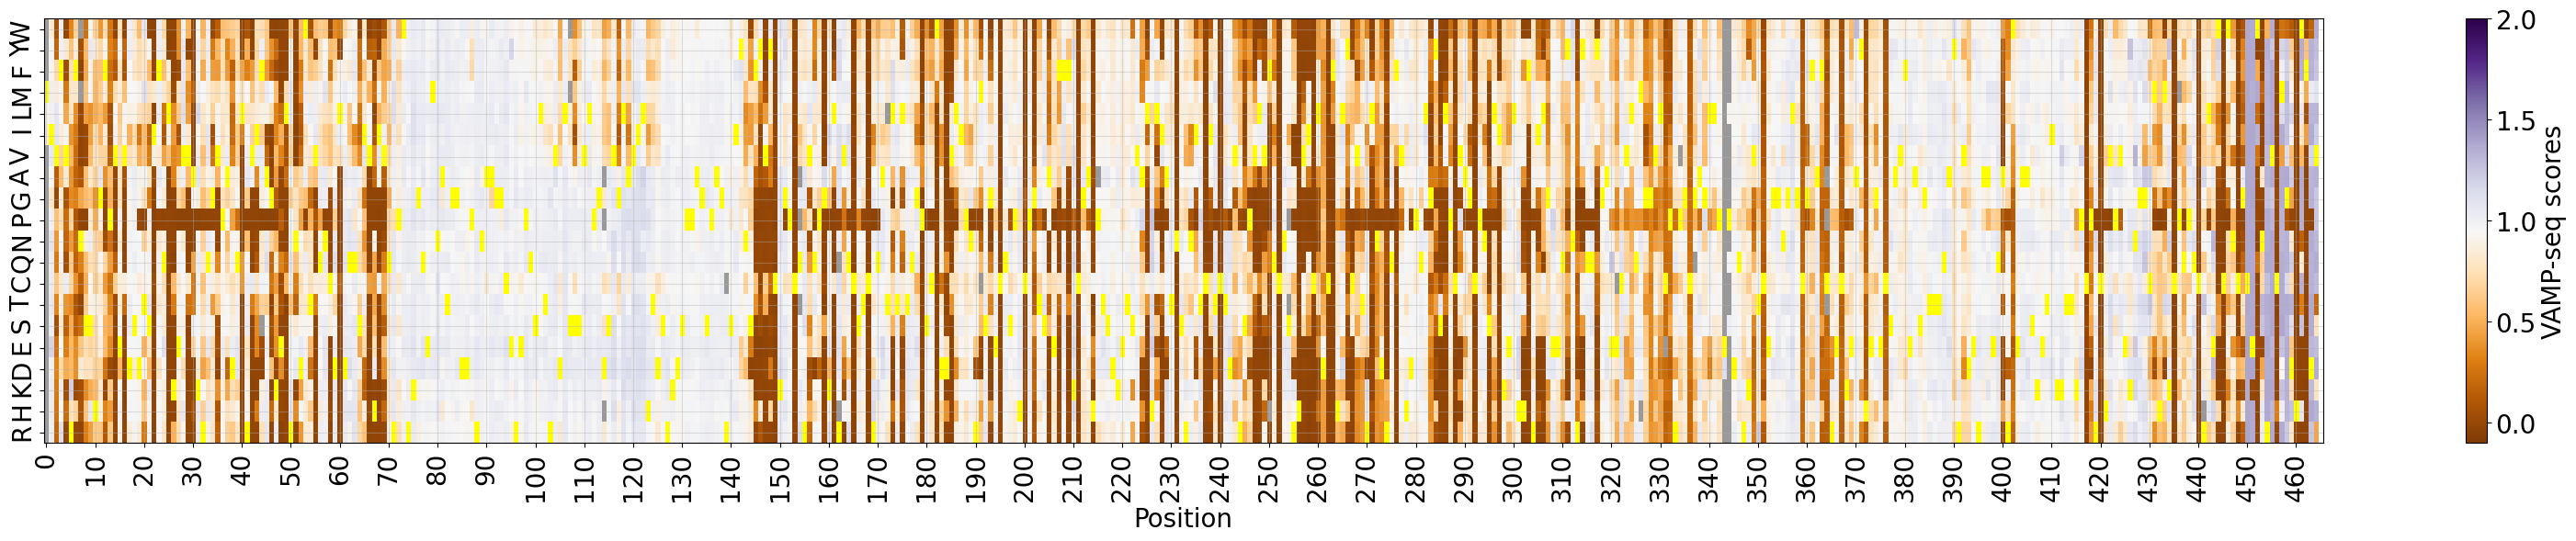

In [34]:
heatmap_scores_reordered_test(vamp_PARKIN_scores,'VAMP-seq scores',PARKIN_WT_sequence,2,0,'PuOr',[0,len(PARKIN_WT_sequence)],figs=[40,6])
#plt.savefig('./figures/PARKIN_heatmap_VAMP.pdf',dpi=300, facecolor='w')

In [35]:
PARKIN_vamp_scores=load_data_from_df(PRKN_df_data,PARKIN_WT_sequence,column_name='vamp_median')

In [36]:
PARKIN_vamp_scores_med=np.median(PARKIN_vamp_scores,axis:=1)


C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\58150921.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap('PuOr')


(-0.5, 465.5)

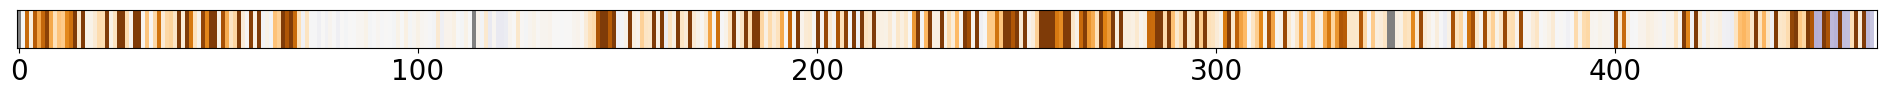

In [37]:
current_cmap = mpl.cm.get_cmap('PuOr')
current_cmap.set_bad(color='grey')

fig, (ax1) = plt.subplots(1,1,figsize=(24,0.5))

ax1.imshow(PARKIN_vamp_scores_med.reshape(1,-1),aspect= 'auto',cmap=current_cmap,vmin=0,vmax=2,interpolation='nearest')
ax1.set_yticks([])
ax1.set_xlim(-0.5,len(PARKIN_WT_sequence)+.5)
#plt.savefig('./figures/PARKIN_VAMP_med.pdf',dpi=300, facecolor='w')

In [45]:
#VAMP nonsense bar
PARKIN_vamp_ter=load_data_from_df(PRKN_ter,PARKIN_WT_sequence,column_name='vamp')
PARKIN_vamp_ter=np.nanmedian(PARKIN_vamp_ter,axis=1)

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\3220046853.py:3: RuntimeWarning: All-NaN slice encountered
  PARKIN_vamp_ter=np.nanmedian(PARKIN_vamp_ter,axis=1)


C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\229617706.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap('PuOr')


(-0.5, 465.5)

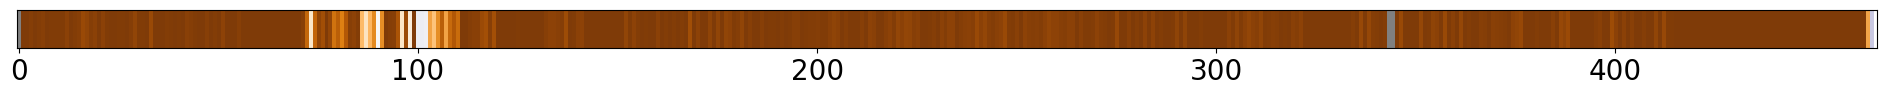

In [46]:
current_cmap = mpl.cm.get_cmap('PuOr')
current_cmap.set_bad(color='grey')

fig, (ax1) = plt.subplots(1,1,figsize=(24,0.5))

ax1.imshow(PARKIN_vamp_ter.reshape(1,-1),aspect= 'auto',cmap=current_cmap,vmin=0,vmax=2,interpolation='nearest')
ax1.set_yticks([])
ax1.set_xlim(-0.5,len(PARKIN_WT_sequence)+.5)
#plt.savefig('./figures/PARKIN_VAMP_ter.pdf',dpi=300, facecolor='w')

In [47]:
PRKN_df_data['vamp_values_ctrlmean_under_1.5']=PRKN_df_data['vamp'][PRKN_df_data['vamp']<0.1]

In [48]:
PRKN_df_data['ctrlmean_under_1.5']=PRKN_df_data['delta_psi'][PRKN_df_data['ctrl_mean']<1.5]

In [49]:
PRKN_df_data['BAG6_not_target']=PRKN_df_data['delta_psi'][PRKN_df_data['ctrlmean_under_1.5']<0.38]
PRKN_df_data_test = PRKN_df_data.dropna(subset=['b6ko_sd'])

In [50]:
PRKN_df_data['BAG6_target']=PRKN_df_data['delta_psi'][PRKN_df_data['delta_psi']>=0.38]
PRKN_df_data_test = PRKN_df_data.dropna(subset=['b6ko_sd'])

In [51]:
dPSI_PARKIN_scores=load_data_from_df(PRKN_df_data_test,PARKIN_WT_sequence,column_name='delta_psi')

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\181270464.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()
C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\181270464.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. inf  1. inf  1.
  1.  1.]


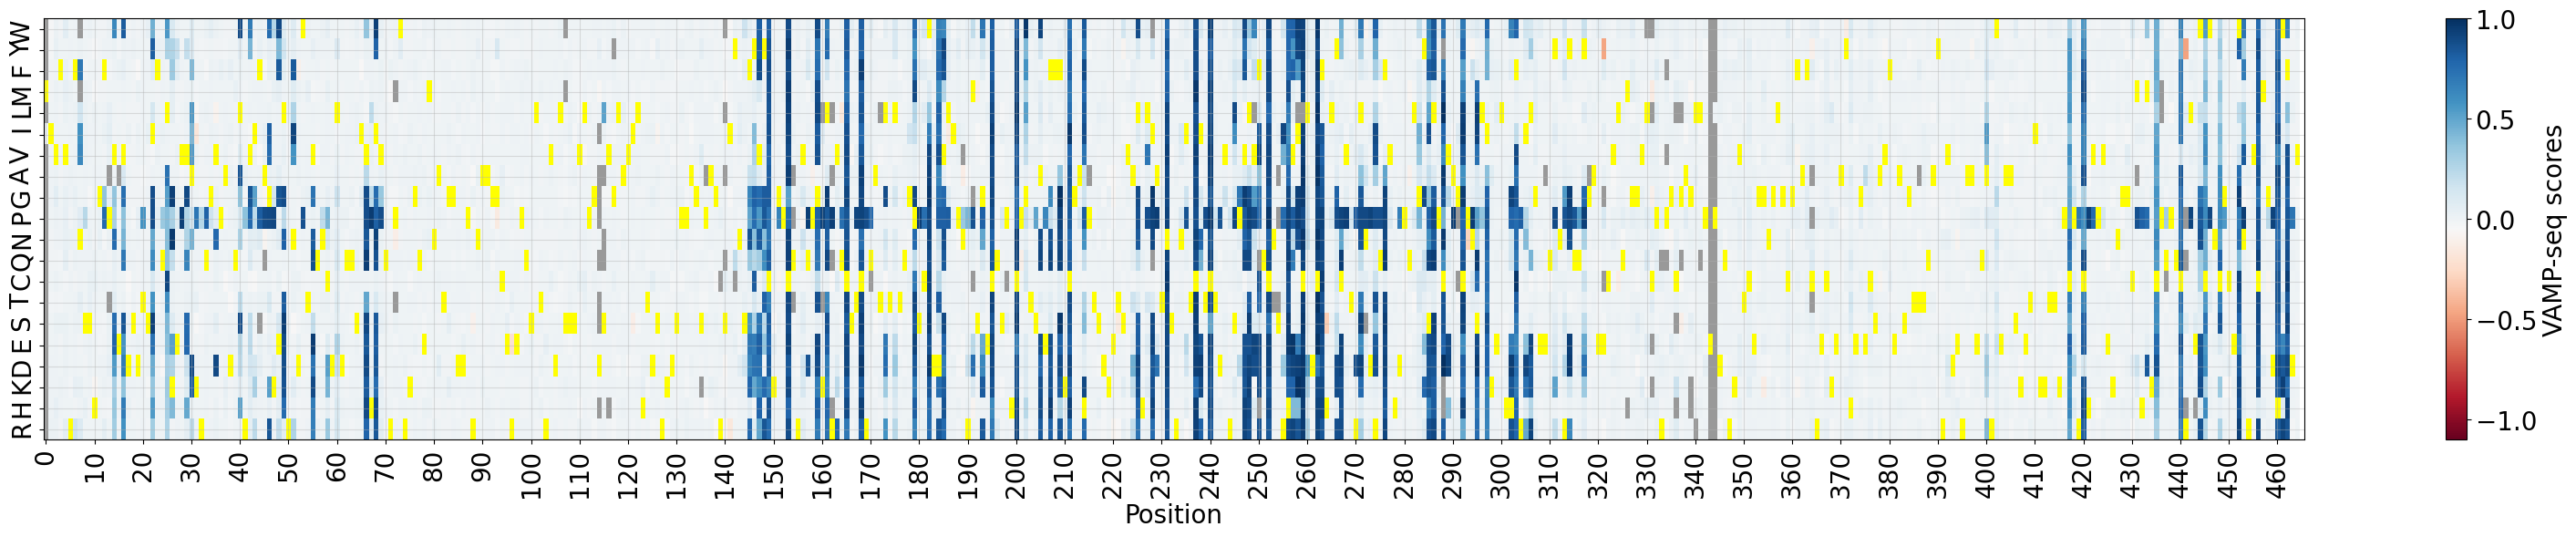

In [52]:
heatmap_scores_reordered_test(dPSI_PARKIN_scores,'VAMP-seq scores',PARKIN_WT_sequence,1,-1, 'RdBu',[0,len(PARKIN_WT_sequence)],figs=[40,6])
#plt.savefig('./PARKIN_heatmap_BAG6_screen.pdf',dpi=300, facecolor='w')

In [53]:
PARKIN_dPSI_scores=load_data_from_df(PRKN_df_data,PARKIN_WT_sequence,column_name='median_dPSI')

In [54]:
PARKIN_dPSI_scores_med=np.median(PARKIN_dPSI_scores,axis:=1)


C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\294165584.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap('RdBu')


(-0.5, 465.5)

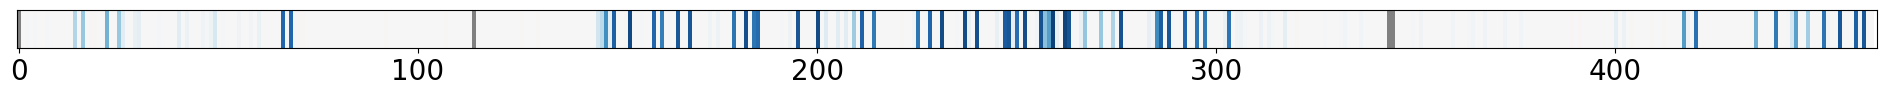

In [55]:

current_cmap = mpl.cm.get_cmap('RdBu')
current_cmap.set_bad(color='grey')

fig, (ax1) = plt.subplots(1,1,figsize=(24,0.5))

ax1.imshow(PARKIN_dPSI_scores_med.reshape(1,-1),aspect= 'auto',cmap=current_cmap,vmin=-1,vmax=1,interpolation='nearest')
ax1.set_yticks([])
ax1.set_xlim(-0.5,len(PARKIN_WT_sequence)+.5)
#plt.savefig('./figures/PARKIN_deltaPSI_med.pdf',dpi=300, facecolor='w')

In [56]:
#Delta PSI nonsense bar
PARKIN_dPSI_ter=load_data_from_df(PRKN_ter,PARKIN_WT_sequence,column_name='delta_psi')
PARKIN_dPSI_ter=np.nanmedian(PARKIN_dPSI_ter,axis=1)

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\2327455376.py:3: RuntimeWarning: All-NaN slice encountered
  PARKIN_dPSI_ter=np.nanmedian(PARKIN_dPSI_ter,axis=1)


C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\2672824346.py:1: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap('RdBu')


(-0.5, 465.5)

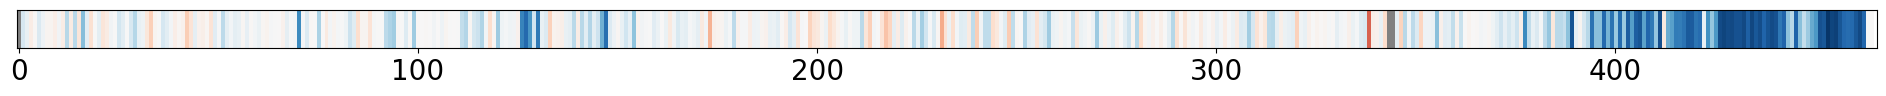

In [57]:
current_cmap = mpl.cm.get_cmap('RdBu')
current_cmap.set_bad(color='grey')

fig, (ax1) = plt.subplots(1,1,figsize=(24,0.5))

ax1.imshow(PARKIN_dPSI_ter.reshape(1,-1),aspect= 'auto',cmap=current_cmap,vmin=-1,vmax=1,interpolation='nearest')
ax1.set_yticks([])
ax1.set_xlim(-0.5,len(PARKIN_WT_sequence)+.5)

#plt.savefig('./figures/PARKIN_deltaPSI_ter.pdf',dpi=300, facecolor='w')

Supplementary figure 8:

In [58]:
BAG6_target=load_data_from_df(PRKN_df_data_test,PARKIN_WT_sequence,column_name='BAG6_target')

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\3361638208.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()
C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\3361638208.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. inf  1.
  1.  1.]


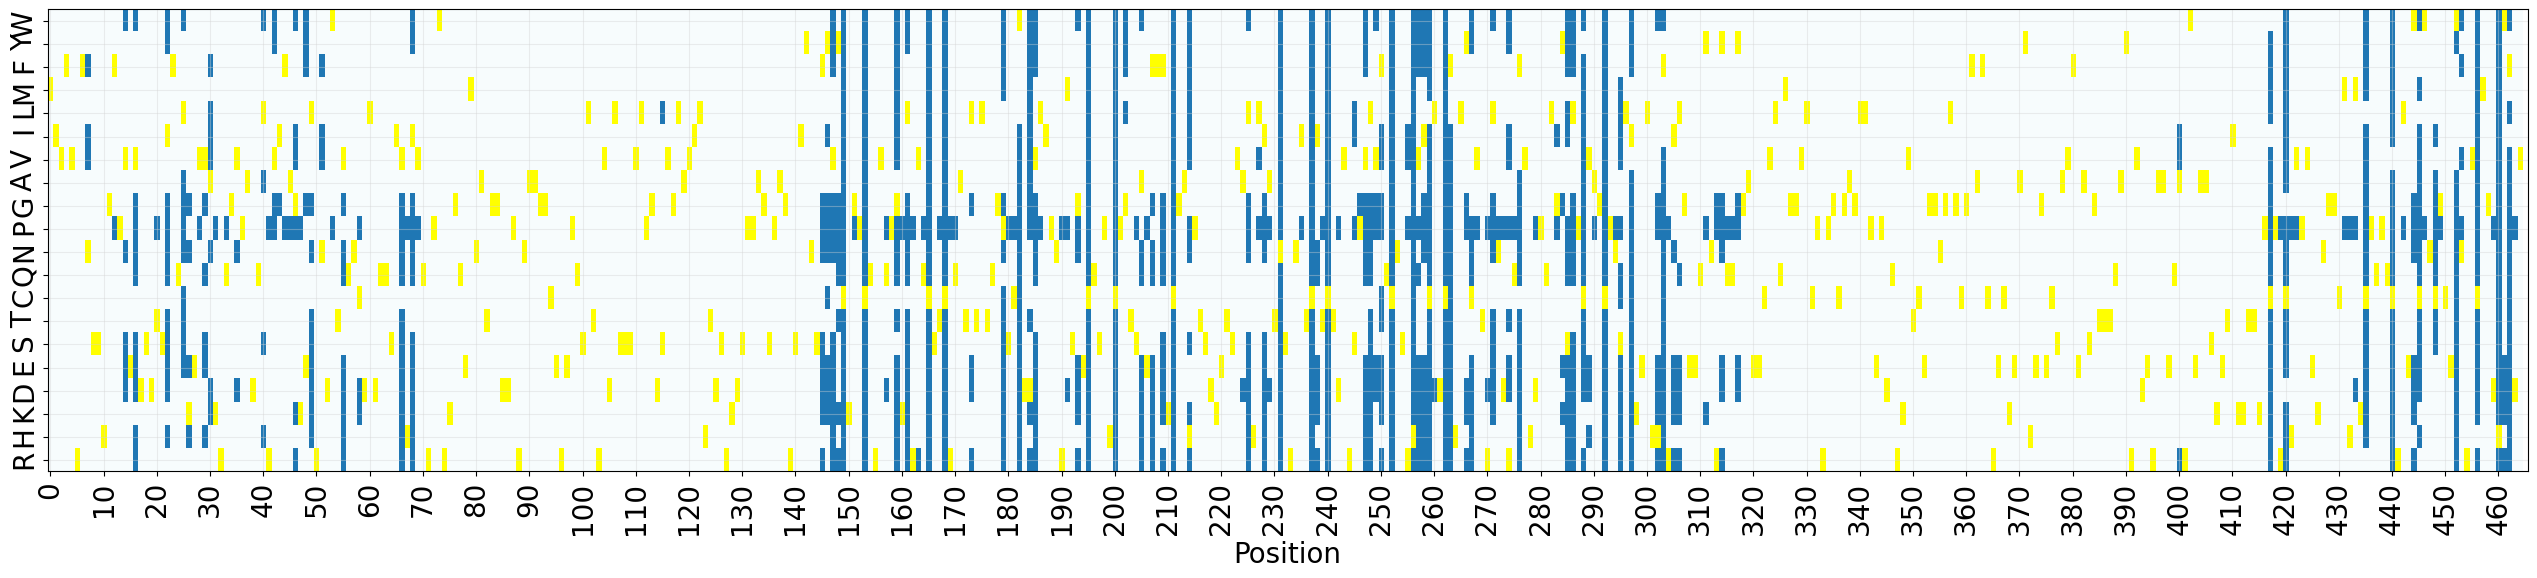

In [59]:
heatmap_scores_reordered_supp(BAG6_target,'VAMP-seq scores',PARKIN_WT_sequence,5,5,'tab10',[0,len(PARKIN_WT_sequence)],figs=[40,6])
#plt.savefig('./figures/PARKIN_heatmap_BAG6_target.pdf',dpi=300, facecolor='w')

In [60]:
not_BAG6_target=load_data_from_df(PRKN_df_data_test,PARKIN_WT_sequence,column_name='BAG6_not_target')

C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\3361638208.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()
C:\Users\lnp589\AppData\Local\Temp\ipykernel_18512\3361638208.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  current_cmap = mpl.cm.get_cmap()


[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1. inf  1.
  1.  1.]


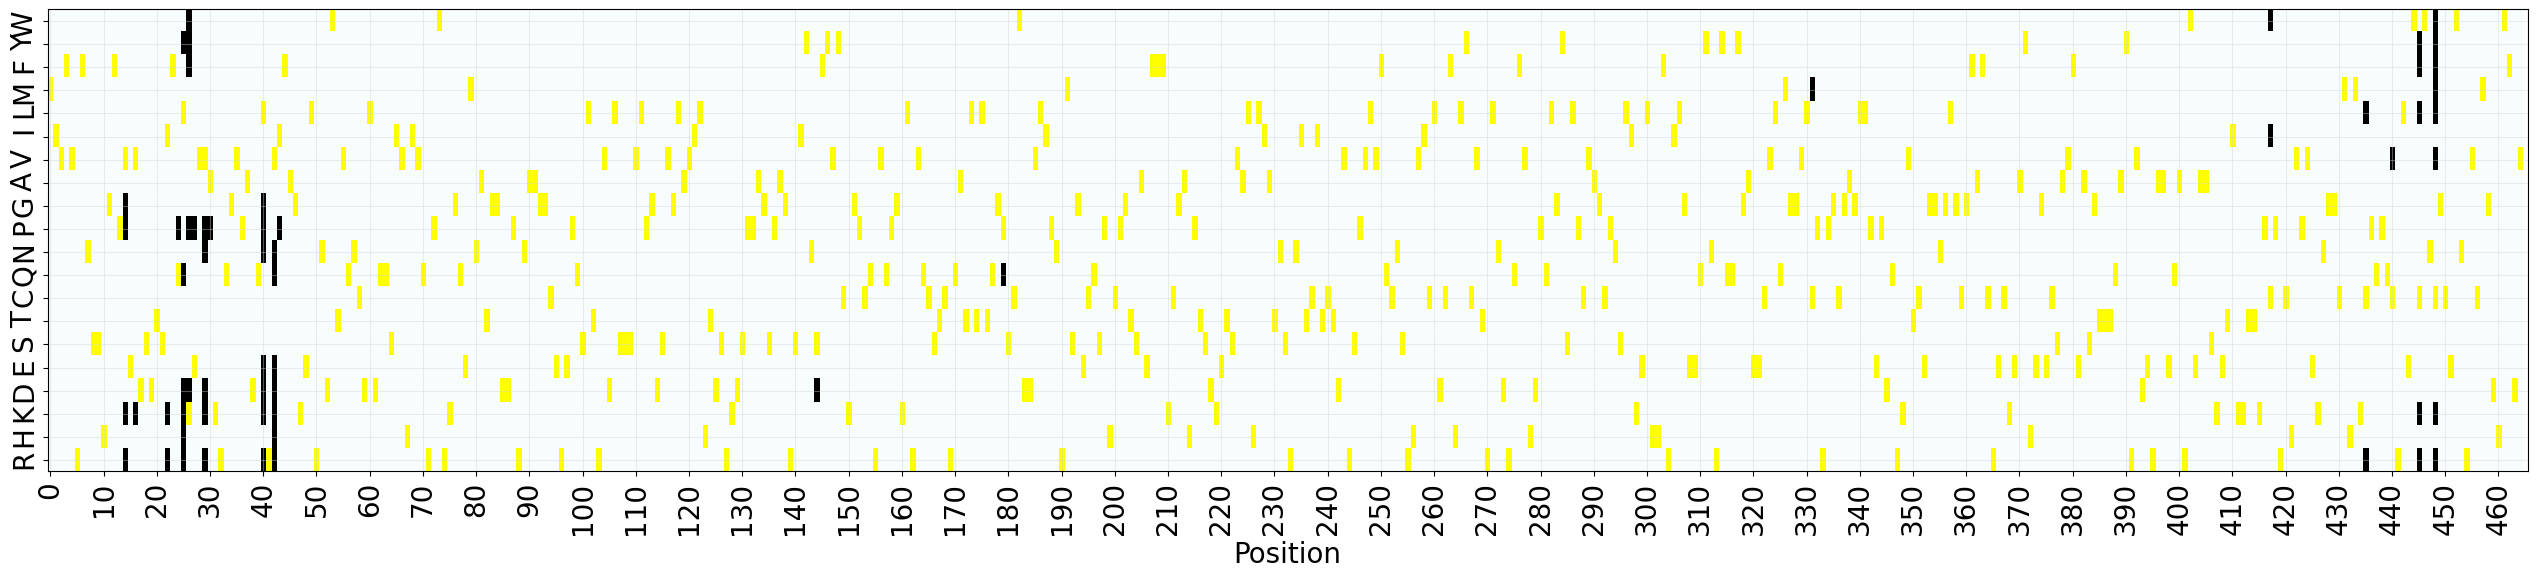

In [61]:
heatmap_scores_reordered_supp(not_BAG6_target,'VAMP-seq scores',PARKIN_WT_sequence,-1,-1,'binary',[0,len(PARKIN_WT_sequence)],figs=[40,6])
#plt.savefig('./PARKIN_heatmap_BAG6_screen_not_target.pdf',dpi=300, facecolor='w')